In [111]:
import numpy as np
import	matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk

In [112]:
train = pd.read_csv('train.csv')
train.set_index('ID',	inplace=True)
print(train.head())

           RAdeg    DEdeg  Hclass     umag     gmag     rmag     imag  \
ID                                                                      
36673  176.71719  1.49288       1  20.3002  17.9628  16.8348  16.3556   
13653  181.62335 -0.80861       2  19.9693  19.1536  18.8779  18.5348   
12443  157.74175 -0.09256       1  19.6725  17.7845  16.8587  16.4569   
18491  200.70446  0.89841       1  18.0130  16.3335  15.5730  15.1977   
9853   181.35481  1.83980       1  19.4998  17.5238  16.5972  16.1700   

          zmag     Ymag     Jmag  ...    i3mag    Z3mag    Y3mag    J3mag  \
ID                                ...                                       
36673  16.0737  16.0880  15.9560  ...  18.6603  18.2878  16.9856  16.7499   
13653  18.6874  18.4206  18.4970  ...  19.6438  18.6437  18.3253  18.3863   
12443  16.4963  16.1736  16.1445  ...  18.3952  17.0539  16.7947  16.5888   
18491  15.4325  15.1048  14.9082  ...  17.6256  16.3231  16.0594  15.8491   
9853   15.9842  15.7832  1

In [113]:
#Magnitudes, para armar colores
H = train.loc[:,'Hmag']
J	= train.loc[:,'Jmag']
U =	train.loc[:,'umag']
G =	train.loc[:,'gmag']
r = train.loc[:,'rmag']
i = train.loc[:,'imag']
z = train.loc[:,'zmag']
Y = train.loc[:,'Ymag']
K = train.loc[:,'Kmag']
W1 =	train.loc[:,'W1mag']
W2 =	train.loc[:,'W2mag']

#Radios donde se encierra la mitad de la luz

Y_r =	train.loc[:,'Yhlr']
J_r =	train.loc[:,'Jhlr']
H_r =	train.loc[:,'Hhlr']
K_r =	train.loc[:,'Khlr']

#Magnitud en apertura fija de 3''

U3 =	train.loc[:,'u3mag']
G3 =	train.loc[:,'g3mag']
r3 =	train.loc[:,'r3mag']
i3 =	train.loc[:,'i3mag']
Z3	=	train.loc[:,'Z3mag']
Y3	=	train.loc[:,'Y3mag']
J3	=	train.loc[:,'J3mag']
H3	=	train.loc[:,'H3mag']
K3	=	train.loc[:,'K3mag']

#Coordenadas

ra = train.loc[:,'RAdeg']
dec = train.loc[:,'DEdeg']

#Clases para entrenar

clase	= train.loc[:,'Hclass'] #0: Estrella, 1: Galaxia, 2: QSO


In [114]:
train['Hclass'].value_counts()

Hclass
1    27572
0     5798
2     3144
Name: count, dtype: int64

In [115]:
train.isna().sum()

RAdeg     0
DEdeg     0
Hclass    0
umag      0
gmag      0
rmag      0
imag      0
zmag      0
Ymag      0
Jmag      0
Hmag      0
Kmag      0
W1mag     0
W2mag     0
u3mag     0
g3mag     0
r3mag     0
i3mag     0
Z3mag     0
Y3mag     0
J3mag     0
H3mag     0
K3mag     0
Yhlr      0
Jhlr      0
Hhlr      0
Khlr      0
dtype: int64

In [116]:
train.describe()

,RAdeg,DEdeg,Hclass,umag,gmag,rmag,imag,zmag,Ymag,Jmag,...,i3mag,Z3mag,Y3mag,J3mag,H3mag,K3mag,Yhlr,Jhlr,Hhlr,Khlr
count,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,...,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000
mean,157.413606,-0.926899,0.927316,21.326973,19.904223,18.887562,18.323593,18.201334,18.022149,17.879179,...,19.761906,18.653363,18.347970,18.157934,17.918551,17.825652,6.305703,79.624646,54.505159,35.399251
std,66.388946,2.411410,0.489506,2.345232,2.289705,2.024082,1.809982,1.721633,1.670744,1.618812,...,1.452674,1.593221,1.491726,1.445090,1.369574,1.218845,1276.789991,5791.337827,3410.995424,2979.311817
min,34.125470,-6.703610,0.000000,13.892700,12.227100,11.396600,10.969100,10.928600,11.072900,10.924400,...,14.761300,13.642800,13.425000,13.477500,13.198100,13.105300,-99.000000,-99.000000,-99.000000,-99.000000
25%,134.743538,-2.492215,1.000000,19.420125,18.024200,17.272875,16.900425,16.835100,16.690250,16.583500,...,18.748725,17.464400,17.226850,17.041725,16.863900,16.873950,0.647672,0.660015,0.668280,0.618118
50%,181.789490,-0.412005,1.000000,21.274150,19.840850,18.795950,18.309800,18.234400,18.070100,17.925500,...,19.796850,18.682700,18.401000,18.208550,17.979500,17.902300,0.917700,0.869215,0.858840,0.816180
75%,209.603552,0.824670,1.000000,23.108600,21.820800,20.461875,19.658450,19.499125,19.253375,19.047475,...,20.993350,19.773800,19.433475,19.182475,18.844775,18.628375,1.434217,1.287025,1.258892,1.193870
max,225.441880,3.021730,2.000000,33.162300,36.154200,25.110400,36.184800,23.480000,22.858900,22.670500,...,24.570800,23.511900,22.461000,22.576200,24.343000,21.743800,134608.831100,668970.396270,427925.236530,435077.487900


Diagramas color color

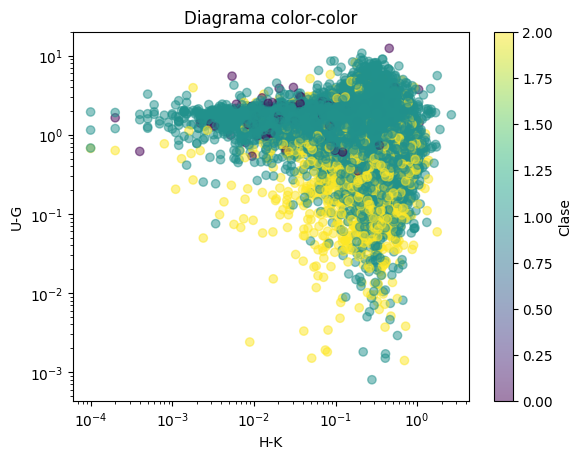

In [117]:
x1 = H - K
y1 = U - G
color1 = clase

plt.scatter(x1, y1, c=color1, cmap='viridis', alpha=0.5)
plt.xlabel('H-K')
plt.ylabel('U-G')
plt.title('Diagrama color-color')
plt.xscale('log')
plt.yscale('log')
plt.colorbar(label='Clase')
plt.show()

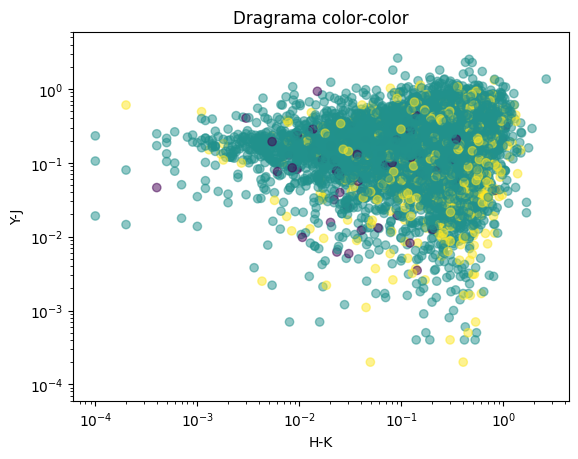

In [118]:
x2 = H-K
y2 = Y-J
plt.scatter(x2,y2, c=color1, cmap='viridis', alpha=0.5)
plt.xlabel('H-K')
plt.ylabel('Y-J')
plt.title('Dragrama color-color')
plt.xscale('log')
plt.yscale('log')
plt.show()

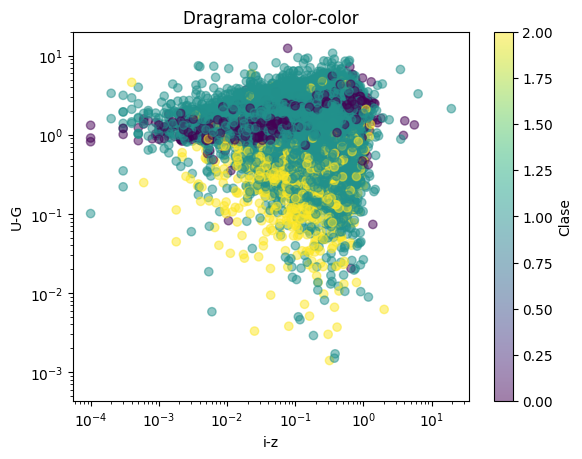

In [119]:
x3 = i-z
y3 = U-G
plt.scatter(x3,y3, c=color1, cmap='viridis', alpha=0.5)
plt.xlabel('i-z')
plt.ylabel('U-G')
plt.title('Dragrama color-color')
plt.colorbar(label='Clase')
plt.xscale('log')
plt.yscale('log')
plt.show()

Ploteemos los radios a mitad de flujo

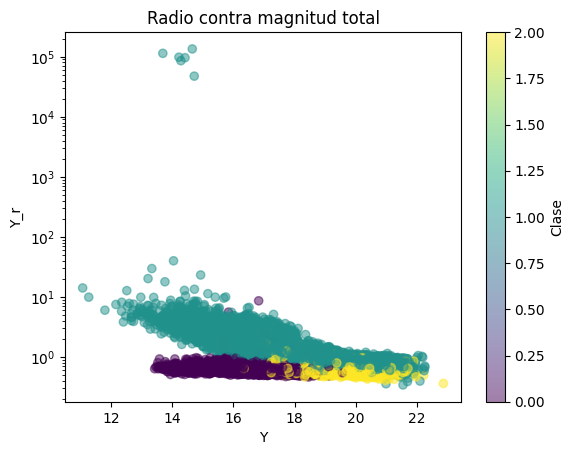

In [120]:
#Me quito los Nans
mask_y	= Y_r > -98
x4	= Y[mask_y]
y4	= Y_r[mask_y]
color2	= clase[mask_y]
plt.scatter(x4,y4, c=color2, cmap='viridis', alpha=0.5)
plt.xlabel('Y')
plt.ylabel('Y_r')
plt.colorbar(label='Clase')
plt.title('Radio contra magnitud total')
#plt.xscale('log')
plt.yscale('log')
plt.show()

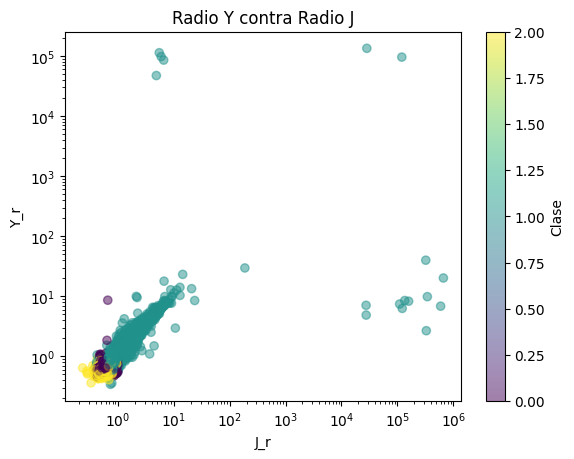

In [121]:
#Me quito los Nans
mask_y	= Y_r > -98
mask_J = J_r > -98
mask_total	= mask_y & mask_J
x5	= J_r[mask_total]
y5	= Y_r[mask_total]
color3	= clase[mask_total]
plt.scatter(x5,y5, c=color3, cmap='viridis', alpha=0.5)
plt.colorbar(label='Clase')
plt.xlabel('J_r')
plt.ylabel('Y_r')
plt.title('Radio Y contra Radio J')
plt.xscale('log')
plt.yscale('log')
plt.show()

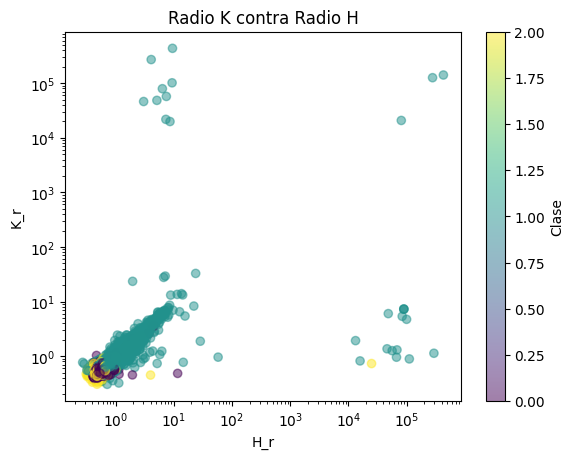

In [122]:
#Me quito los Nans
mask_H	= H_r > -98
mask_K = K_r > -98
mask_total	= mask_H & mask_K
x6	= H_r[mask_total]
y6	= K_r[mask_total]
color3	= clase[mask_total]
plt.scatter(x6,y6, c=color3, cmap='viridis', alpha=0.5)
plt.colorbar(label='Clase')
plt.xlabel('H_r')
plt.ylabel('K_r')
plt.title('Radio K contra Radio H')
plt.xscale('log')
plt.yscale('log')
plt.show()

Ejemplo

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
#Lo separo en train y test para entrenar localmente, un 30% destinado al test y le fijo una semilla para que siempre sea lo mismo
df_train, df_test = train_test_split(train, test_size=0.3, random_state=42)

In [125]:
X_train = df_train.drop('Hclass', axis=1)
Y_train	= df_train['Hclass']
X_test	= df_test.drop('Hclass', axis=1)
Y_test	= df_test['Hclass']

In [126]:
from sklearn.tree	import DecisionTreeClassifier

clf =	DecisionTreeClassifier()

In [127]:
clf.fit(X_train, Y_train) #Entreno el modelo

DecisionTreeClassifier()

In [128]:
y_pred = clf.predict(X_test) #Lo aplico	al test

In [129]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report #Métricas	para evaluar el modelo

In [130]:
confusion_matrix(Y_test, y_pred)

array([[1658,   49,   15],
       [  41, 8140,  122],
       [  10,  110,  810]])

In [131]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1722
           1       0.98      0.98      0.98      8303
           2       0.86      0.87      0.86       930

    accuracy                           0.97     10955
   macro avg       0.94      0.94      0.94     10955
weighted avg       0.97      0.97      0.97     10955



In [132]:
f1_score(Y_test, y_pred, average='weighted') #Promedio pesado, pues está desbalanceado, esto es lo que nos evalúa Kaggle

np.float64(0.9684077743710336)

In [133]:
df_sumbit	= pd.read_csv('test.csv')
df_sumbit.set_index('ID',	inplace=True)

In [139]:
predictions = clf.predict(df_sumbit)
df_sumbit['Hclass'] =	predictions

In [140]:
df_sumbit.loc[:,['Hclass']].to_csv('submission_ejemplo.csv',index=True)